In [ ]:
#Social_Networks_Ads.csv

#TASK_7 ASSIGNMENT 13 KNN ML MODEL
#SUBMITTED BY : RANGANADH NARAYANAM
#SUBMITTED ON: 05-05-2022

#Importing the libraries

In [15]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

%matplotlib inline 

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
#from sklearn import datasets, neighbors
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score # import all the functions reqd for cross validation

#Importing the dataset

In [5]:
data=pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


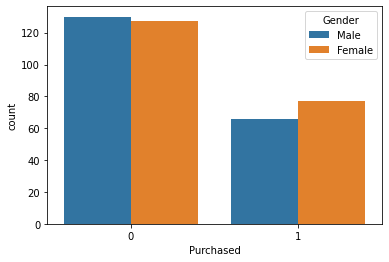

In [7]:
sns.countplot(data['Purchased'],hue=data['Gender'])

#Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
X=data[['Age','EstimatedSalary']]
y=data['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#Fitting K-NN to the Training set

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn_model=KNeighborsClassifier(n_neighbors=5)

In [12]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

#Predicting the Test set results

In [13]:
knn_predictions=knn_model.predict(X_test)

#Making the Confusion Matrix

In [16]:
print('Confusion Matrix - \n',confusion_matrix(y_test,knn_predictions))
print('\n')
print('Classification Report - \n',classification_report(y_test,knn_predictions))
print('\n')
print('Accuracy Of Our Model -',accuracy_score(y_test,knn_predictions))

Confusion Matrix - 
 [[73  6]
 [ 4 37]]


Classification Report - 
               precision    recall  f1-score   support

           0       0.95      0.92      0.94        79
           1       0.86      0.90      0.88        41

    accuracy                           0.92       120
   macro avg       0.90      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120



Accuracy Of Our Model - 0.9166666666666666


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

data1 = pd.read_csv('/content/Social_Network_Ads.csv')


In [29]:
def knn_comparison(data, k): 
  x = data[['X','Y']].values 
  y = data['class'].astype(int).values 
  clf = KNeighborsClassifier(n_neighbors=k)  
  clf.fit(x, y) 
  print("Train Accuracy : ", clf.score(x,y)) 
  print("Val Accuracy : ", np.mean(cross_val_score(clf, x, y, cv=10)))
  
  plot_decision_regions(x, y, clf=clf, legend=2) 
  
  plt.xlabel('X') 
  plt.ylabel('Y') 
  plt.title('Knn with K='+ str(k)) 
  plt.show() 

def knn_no_plot(data, k): 
  x = data[['X','Y']].values 
  y = data['class'].astype(int).values 
  clf = KNeighborsClassifier(n_neighbors=k) 
  clf.fit(x, y) 
  print("K : ", k, " Train Accuracy : ", clf.score(x,y), " Val Accuracy : ", np.mean(cross_val_score(clf, x, y, cv=5)))  # test the model and it computes the accuracy (train data accuracy)
  

In [30]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train,y_train) # training the model
  print("K value  : " , i, " score : ", roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])) #predicting using the model

K value  :  1  score :  0.8825254708243284
K value  :  2  score :  0.9257486878666255
K value  :  3  score :  0.9325409076875579
K value  :  4  score :  0.9391787588761963
K value  :  5  score :  0.9393331275084902
K value  :  6  score :  0.9484408768138314
K value  :  7  score :  0.9445816610064834
K value  :  8  score :  0.9475146650200679
K value  :  9  score :  0.9504476690336523
K value  :  10  score :  0.9484408768138315
K value  :  20  score :  0.9648039518369868
K value  :  50  score :  0.9731398579808583


In [39]:
from sklearn.metrics import confusion_matrix
y_pred=knn_model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

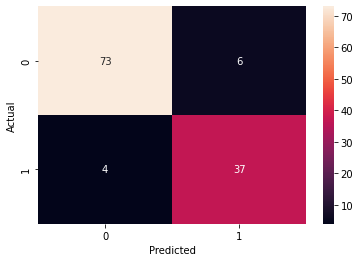

In [41]:
import seaborn as sn
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)